In [1]:
import requests
import json
import pandas as pd

# Instantiate the client with an endpoint.



In [2]:
url = 'https://api.thegraph.com/subgraphs/name/rarible/protocol'


In [3]:
def graph_query(url, query):
    r = requests.post(url, json={'query': query})
#    print(r.status_code)
#    print(r.text)
    return r

Deal - represents the Buy event

 - type - deal initiation method (Order or Bid)
 - seller - seller's address
 - buyer - buyer's address
 - sellTokenId - token to sell id
 - sellToken - token to sell address
 - buyToken - token to buy address
 - sellAmount - amount of sellToken
 - buyAmount - amount of buyToken
 - price - price in a buyToken currency
 - fee - fee in a buyToken currency
 - txHash - transaction hash
 - blockNumber - number of the block
 - blockTime - timestamp of the block
 - contract - ContractType
 
Block - represents the ethereum block

 - blockNumber - number of the block
 - blockTime - timestamp of the block

Counter - counter for each ContractType

 - count - number of events under the specified contract
 - firstBlock - Block of the first event
 - lastBlock - Block of the last event
 - contract - ContractType

DealType - enumerates deal initiation methods

 - Order
 - Bid

ContractType - enumeration for contracts

 - TokenSale
 - ERC721SaleV1
 - ERC721SaleV2
 - ERC1155SaleV1
 - ERC1155SaleV2
 - ExchangeV1

### List of deals

In [223]:
query1 = """query {
    deals (first: 1000){
        seller
        buyer
        sellTokenId
        sellToken
        buyToken
        sellAmount
        buyAmount
        price
        fee
        txHash
        blockNumber
        blockTime
        contract
    }
}
"""

In [224]:
def query_graph(url, query1):
    r = graph_query(url, query1)
    json_data = r.json()
    return json_data

In [225]:
json_data = query_graph(url, query1)

In [226]:
json_data

{'data': {'deals': [{'blockNumber': '11952304',
    'blockTime': '1614601329',
    'buyAmount': '50000000000000000',
    'buyToken': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
    'buyer': '0xc5f6c034ce57fdced21a7d5d39b0ca5c60d998f2',
    'contract': 'ExchangeV1',
    'fee': '2500000000000000',
    'price': '50000000000000000',
    'sellAmount': '1',
    'sellToken': '0xd07dc4262bcdbf85190c01c996b4c06a461d2430',
    'sellTokenId': '181266',
    'seller': '0x6d3d576d316925fbf4a6ba443ce8000b5a723bb1',
    'txHash': '0x00005b52b0300d02b75f207ae4144168af769b17f2afc99207e2d50682976b2c'},
   {'blockNumber': '12441125',
    'blockTime': '1621109751',
    'buyAmount': '7100000000000000',
    'buyToken': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2',
    'buyer': '0xb2db703bc5bbe058809594cd64c6c5c915c013d3',
    'contract': 'ExchangeV1',
    'fee': '355000000000000',
    'price': '7100000000000000',
    'sellAmount': '1',
    'sellToken': '0xd07dc4262bcdbf85190c01c996b4c06a461d2430',
    'sel

In [227]:
df_data = json_data['data']['deals']
df_deals1000 = pd.DataFrame(df_data)

In [228]:
len(df_deals1000)

1000

In [229]:
df2 = df_deals1000.sort_values(by=['blockTime'])
df2['blockTime'] = pd.to_numeric(df2['blockTime']) / (24*60*1000*60)

In [239]:
df2

,blockNumber,blockTime,buyAmount,buyToken,buyer,contract,fee,price,sellAmount,sellToken,sellTokenId,seller,txHash
344,9561834,18.318933,190000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xab3627317c43d394eb171170f818153b976d28a3,TokenSale,9500000000000000,190000000000000000,1,0x6a5ff3ceecae9ceb96e6ac6c76b82af8b39f0eb3,1725,0xdc181cde7f10db2892605c810943d74ba2c52b01,0x006ebcc644a66d5515725ee2697c44672b6c7459ac20...
299,9574557,18.320890,150000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x1c5eb68630ccd90c3152fb9dee3a1c2a7201631d,TokenSale,7500000000000000,150000000000000000,1,0x6a5ff3ceecae9ceb96e6ac6c76b82af8b39f0eb3,2260,0xa12db9f88f096f527fbe87a752c6ec16d501a25f,0x00609fcfd99aaf83c0d5480dd7e661d09d947a2fb9fc...
664,9626874,18.328923,66600000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x03a1f76a666a9cf9240a17827f780ee9a62b6af6,TokenSale,3330000000000000,66600000000000000,1,0x6e058ccbb49b05ada07f2cf75f7f4647901b5b3f,2879,0x2791de4ee53da7b499cf276d003637f0c3cf8a3e,0x00dde5d0fced76585a6f94700a2194d799c5d1c7d7c2...
62,9767837,18.350720,5000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xb9a3520eb5b9369e408ab33e581a4bd4950e4f35,TokenSale,250000000000000,5000000000000000,1,0x6a5ff3ceecae9ceb96e6ac6c76b82af8b39f0eb3,3241,0x8124b02b4967bd7338a450420a572d574915ff9c,0x0011e90ec95fb8897cfdde0d57bcf224d2061aa93fc5...
777,9806596,18.356685,23000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x2c3ef1f3df0bf1409af53f8fc0bafdfe60318e01,TokenSale,1150000000000000,23000000000000000,1,0xa915455f225fc13f32b0a6934b4e2d7467bd9e66,5436,0xd1b06286f759cd9e1c140c6311ff8f2816167e65,0x01079c0143a5665c5d6ec6c052a99e5f6b5b6caa6044...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,12674395,18.799006,88800000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x61a7544a0d5e82987726a124571512bd1d893683,ExchangeV1,4440000000000000,88800000000000000,1,0x61bd6b10c7bf3e548f8659d016079e099510a4dc,10306,0xc819f1934f30fe55608bf893c0d776d0150b3a8f,0x00e206a8db372c251d85a8232606d24bf9660b6e5481...
26,12681853,18.800180,500000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x59bd8233cbce1f79a89067f5cfcef74e35f73889,ExchangeV1,25000000000000000,500000000000000000,1,0x6cd2abb5d4cd191236d2ed4f0612dcfe9e98844a,1,0xb77728a6cb7dfa571f5bd64e7a0db0669d41eb5d,0x0006cba8b4a912d604b9d44e39a66c551b2bae9b0dee...
514,12686604,18.800915,30000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa25423a31f50c58e2dde3e87d599c9b3d6f85964,ExchangeV1,1500000000000000,15000000000000000,2,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,491723,0x4d99a750324ad91f6f3418b890b2d365b7b2dd6a,0x00a9a036756f26e43c004daf3fe8845dccdc18be759d...
133,12694761,18.802190,488000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdba19d69d90e43ccb79902612d742817a072202b,ExchangeV1,24400000000000000,488000000000000000,1,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,601284,0xaef965a4fd888145d64e26d59ea092ad109e1e6d,0x002c7c0d7f85e7b967c2a4f48fc7c44bc7d66d4dae05...


In [240]:
df2['txHash'].iloc[1]

'0x00609fcfd99aaf83c0d5480dd7e661d09d947a2fb9fc128c95dd78889012a1ff'

In [233]:
len(df2['sellTokenId'].unique())


834

In [234]:
len(df2['buyer'].unique())

855

In [152]:
buyers = df2['buyer'].unique()

In [82]:
df2['contract'].unique()

array(['TokenSale', 'ERC1155SaleV1', 'ERC721SaleV1', 'ERC721SaleV2',
       'ERC1155SaleV2', 'ExchangeV1'], dtype=object)

In [250]:
df_all = pd.DataFrame()
for i in buyers:
    query_buyers = """query {
        deals (where: {buyer: \""""+str(i)+"""\"}){
            seller
            buyer
            sellTokenId
            sellToken
            buyToken
            sellAmount
            buyAmount
            price
            fee
            txHash
            blockNumber
            blockTime
            contract
        }
    }
    """
    print(i)
    r = graph_query(url, query_buyers)
    json_data = r.json()
    df_data = json_data['data']['deals']
    df_all = df_all.append(df_data)

0xab3627317c43d394eb171170f818153b976d28a3
0x1c5eb68630ccd90c3152fb9dee3a1c2a7201631d
0x03a1f76a666a9cf9240a17827f780ee9a62b6af6
0xb9a3520eb5b9369e408ab33e581a4bd4950e4f35
0x2c3ef1f3df0bf1409af53f8fc0bafdfe60318e01
0xb394f1aa30ba874df3ae6097bf4c2474b2d8f3ac
0x2dce231cd14daef55d6ab0654da7c58b23100782
0xfe955fd76d50106e517bf755f4c6f4b36af3a106
0x9d28a6e8997b70a5745aa320e76382083b9b046c
0xd906979081fcb040f00213e86fb887a12de2c495
0xe703f231ab056ecb99c92a1232cc1020acfc72f8
0x7535da202d79ca57299918c60c218f9b779aa14c
0xb91f32958c4c6a775f882439c5b8d3b4a36e9cdc
0xbf5c6d85510e491cd45d1264fffec0c2c4282564
0x2a3f7e5170ea8ca967f85f091ef84591f639e031
0xd4d350e0e7730660e6cdf532d613cdfe775d6513
0x5da7351a4cb03c33e11f51841bc614d985812821
0x9f7064dfe6ca5856b3afd7a3b3974686a35bdab5
0xc2fea212cb7635602b4b7993afeaecc97a873d5e
0xf52393e120f918ffba50410b90a29b1f8250c879
0x8124b02b4967bd7338a450420a572d574915ff9c
0x67f3d16a91991cf169920f1e79f78e66708da328
0x240ad467a71210629d71d4de22ebde27951c83fc
0x5068c2760

0xbfe688682811c8f316104443871792f275805b8e
0x8703a8dcde11f43c558accbb20c383c75e4da2c4
0x917292684f8157169c53dd1fcf596e34e22ba6c6
0x50d9499395066fdc77ac483615c2024f04213f47
0xeaa0359ffddda0bcdf04e90bf624a9284254f8c0
0x444d235cba7c69ebad6dab0469a18b932c27a336
0xcd0b3ad54ff89f5aaf3497874b9f18a91b0889ae
0x0c88f0f125c59cad35c704b8044107f2e51d28fe
0xa404a9dcc8988f68f22fdb71fb6005b9bd49b4dc
0xfe2fa5e4d69ecd186eced58870991bfd1bbeb6b0
0xe43873ed698085d92fefab766dee5262ad98b2e3
0x554150ab1eeb5ca5bb6a3a6aaa48050d3060b4f7
0xfb73ab9a1dfcad7727f505ffb55ddd6bf637da5f
0x3a3355805181ba5752cb52cebe8c95c0f3ed3d61
0xa57114f8e6bf2eda1bc77ebe1ff03cdfc24bc276
0xdd956ab0f6020c2be35be89c54ba8841e290f778
0x1f659c4f5b33f5ea5993ed32b0e126c9cc2404c9
0x77d21e0fe1d37edc537c90a058a824d8311a14f4
0xdbe92acad3125aaddae065e96a7107f8649bfdf9
0xa841025eab8960c9cfb573878b8bf499b8749d62
0xecdba038c607db25f7e5a218c5611b7604ae97c7
0x4262926002c3c91ed6cec05ca3ea884254ac7fa8
0x63f587fc66d140368be6f808785937d63b8e6fc4
0x512c57915

0xf8c1a40ae021ca4edb8bc8cec932e723a53d38fb
0xb5e93790dca4f2fc02590877b6197fd82a807d1f
0x995e0505603a19ee5c469d2359427bea68c6e953
0x9482a42bf92f7fca8aaf53da2f38555c6ce7265b
0xffb76c60e3ee62d0f2c219c21c39affbfd5fbbb6
0x7d8ce634e371553ee39ee92c04fa17184f17b1b5
0x1de989ddf4e3785a91d7545f6873af9e61c47dff
0xa7fe2ca9b60491e1bfc2042e23caaca439873c64
0x588e3b9898c10a9c4bc03997ccbeb57770655a2a
0x8e63e4376dde62cb82f5a91c4bce4156457dedb1
0x07e80c21a5196bf5b2b31abbfa1e742f5e95e01d
0x1332706a6b68b80c24f7d5fe1d24379c34265e59
0xd89cdcba2a2f85fb3b185253ca29c6127eb7cef5
0x0f13316b80872eda120d7844ed1c1e90fc001dc1
0x8a4f2484ec156bc54180ab6eb80bb0226d984cd3
0xf6c530eed1279561d1369a56198f281faf2f5f2c
0x1c665df693fc7f62e4712fc1872ce158e79f872c
0xc643c9411a6b489e9833b16631140f42bbfcb6d1
0xab3e5a900663ea8c573b8f893d540d331fbab9f5
0xafd0b1131f1a12c7ba707e391fdd1ee67c34552b
0x745d9d210817206562ac06bcf48f92d84b6d3c6e
0x51fab80a5296672dac1bb18e378d8dd81ed80d9a
0xd6834431f2486591a662eaf7bf334fed192654c3
0xf688e3ec9

0xbd23ba386baf796b6526e1670d9dddf1f7b15ebb
0xb49b4a2d614a340818e43c4769a303eeccd040fc
0x94b5fb869418eafeb228cd09d7702cffec12376b
0x6273540b8160b2d923652552fade0da98bb10dc5
0xb5322202f151ac36b42bb5c720038e4ee2a22fd5
0x51e63c52204909607f6b5ca47319e85d5bfa2051
0x9aae3bd2b5ba77ed9e19badd99c0cb7247d4f159
0x45184c6cde198f031538b60eb7e8f38a82f7b013
0x387ddb81ecab04287e16e0e1381df44448bab38a
0x27b1a27ccb70e38a656009a1af2176df4fbab4b7
0x6014697ec7b48e38b35063c906f7e84743ddc4d5
0x8d66809131cceb77a10f6f34b1666c2f781a155c
0x4c2187f7381286f992a8f403dc09f7416804f51c
0x0466c42d8c091038ed022b7de98cc9c59fd06f0a
0x7b0186e0f5e793ca5b9df0ac10f6434264428c86
0xc42a61847f7a365c3cb8c9167474eee37f56adcd
0x241f57f6670b7c948410cab72226b5f3240a16ff
0x316d5e60463e392601305834b3816d1d27d3e423
0x0925d347f811d264879271d2905f54309eaccb93
0x886c4d1d4bc99399a42ef9cdcbf0f0dfa700a860
0xfccb96245ece8c0c0ba80992a5719cba1e2f504f
0x41e2e9aefc57f7760807897125f6dd5c18168f85
0xa6a86e4ef86a3c575be4748e7ab6b8041b377a53
0x0c544f463

0x263108604e0c9e1f6cdcf698e160cd563635a328
0x57a4099e157a98631fc36f151d7cf1b6d2935ca7
0x1f4fae060019a8b6cba7685de6d481efb0290e5b
0x16b966e7d8d00b028fba47830c65e7f7ae88bf1e
0x2b6247079ddd8e81b34093e911284253bd455ef6
0xafc4511958597fab2d1f2f98d621f2fe52e3ca42
0x97ca90ab3a66abda308f0b238f2bb27aab48735f
0xc864b0ab18b0ed0beab72f915bacb12971fdb73a
0xf8e07d60d9b7651a319eda851d9579590bde12e3
0xb2db703bc5bbe058809594cd64c6c5c915c013d3
0xb67ea0fb839840351a269ba7d398300e531c99ee
0x6a7b4d7f68607a5a64e580479c3dd48e1c851843
0x769b100c21ccc90dc96ee15b1ff888a446dbe4d9
0x4a377ff5146d288523f989771c9e05fa18cef21e
0xa9c5b41605f51f3ba6aeb62258b0df9b9384d8a1
0x861b1a3cecdefa1852599a9026d99f8fbbf82ae6
0x8ab1aefc1384a0ecbd37f90e5d8c09d56b22433d
0xdef54552f61c28f8d77d25a592276f7405233c14
0xf4883b160f3de4728f5ace0635a0cd4bee5c7fc9
0x87e1d58791ebbc10130d3aed6d87c833c7db1b1b
0xe4c8efd2ed3051b22ea3eede1af266452b0e66e9
0x7f827d73f834da1c7e72c2596668505aa3d481ca
0xd36c7318b9c2ca393c8f964bae89f388b5dc1646
0x1b2965dc3

In [251]:
len(df_all)

24302

In [154]:
sellers = df2['seller'].unique()

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt


In [103]:
%matplotlib inline

plt.style.use('bmh')

count                   5000
unique                   769
top       100000000000000000
freq                     486
Name: price, dtype: object


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


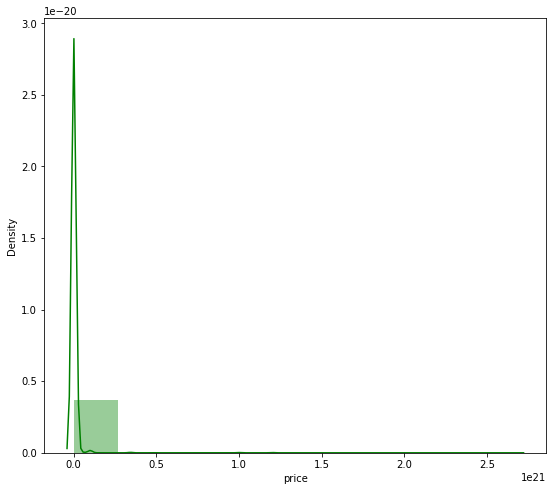

In [86]:
print(df2['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df2['price'], color='g', bins=10, hist_kws={'alpha': 0.4});

In [157]:
print(df2['sellToken'].value_counts())


0xd07dc4262bcdbf85190c01c996b4c06a461d2430    629
0x60f80121c31a0d46b5279700f9df786054aa5ee5     96
0x729cd6226751279030757f61b2cac4798c949fa1     11
0x6a5ff3ceecae9ceb96e6ac6c76b82af8b39f0eb3     10
0xb7f7f6c52f2e2fdb1963eab30438024864c313f6      9
                                             ... 
0x33859e4c083544e506712984b81ea3f3b551bc16      1
0x743459891cced06fbcf574a51c1d92016bc9d039      1
0x5bbef39747422e21991f5c8dc7e8b0c938c9970a      1
0x78d551cd9e5ad303b6bb60df75e21ad22480de93      1
0xba5192b7d4c3135d371d2ab7222a7cf360783ee0      1
Name: sellToken, Length: 173, dtype: int64


<AxesSubplot:xlabel='contract', ylabel='Count'>

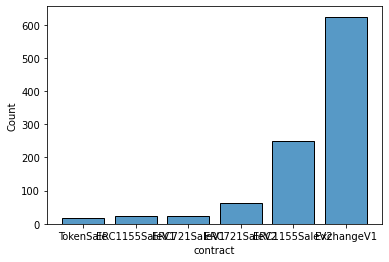

In [155]:
sns.histplot(data=df2, x="contract", shrink=.8)

<AxesSubplot:xlabel='price', ylabel='Count'>

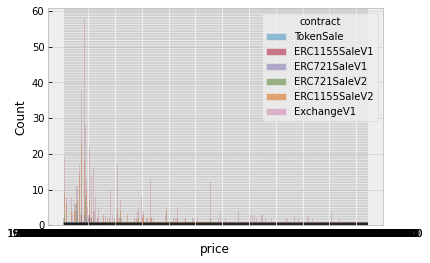

In [117]:
sns.histplot(data=df2, x="price", hue="contract", bins=30)

In [104]:
df2.columns

Index(['blockNumber', 'blockTime', 'buyAmount', 'buyToken', 'buyer',
       'contract', 'fee', 'price', 'sellAmount', 'sellToken', 'sellTokenId',
       'seller', 'txHash'],
      dtype='object')

### List of deals specified by a contract

In [53]:
query1 = """query {
    deals (where: { contract: ExchangeV1 }) {
        seller
        buyer
        sellTokenId
        sellToken
        buyToken
        sellAmount
        buyAmount
        price
        fee
        txHash
        blockNumber
        blockTime
        contract
    }
}
"""

In [54]:
r = graph_query(url, query1)
json_data = r.json()

In [55]:
df_data = json_data['data']['deals']
df = pd.DataFrame(df_data)

In [56]:
df_

,blockNumber,blockTime,buyAmount,buyToken,buyer,contract,fee,price,sellAmount,sellToken,sellTokenId,seller,txHash
0,11952304,1614601329,50000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xc5f6c034ce57fdced21a7d5d39b0ca5c60d998f2,ExchangeV1,2500000000000000,50000000000000000,1,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,181266,0x6d3d576d316925fbf4a6ba443ce8000b5a723bb1,0x00005b52b0300d02b75f207ae4144168af769b17f2af...
1,12441125,1621109751,7100000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xb2db703bc5bbe058809594cd64c6c5c915c013d3,ExchangeV1,355000000000000,7100000000000000,1,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,537093,0x92ca338c90ef25fc0c940cc8ab66feee461044e7,0x00011cd54b89ca8e51a18042df69043881e97ce6f864...
2,11421665,1607556297,99849735378750000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xcd0b3ad54ff89f5aaf3497874b9f18a91b0889ae,ExchangeV1,4992486768937500,19969947075750000,5,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,80999,0x9363c50f2040ce13cec8986228a44376d108cad6,0x0001872483be0f30cf9a0b0c84a0bd3c4082c750895e...
3,12021685,1615524952,1000000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x37a891b0f90bdd47cbe4fccd1dae1303c4c3e3e5,ExchangeV1,50000000000000000,1000000000000000000,1,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,270329,0x140a4aafe53d90706da79dd414e27ce39357fa89,0x0001a7b3beb301f985f13b7ac296a8a48283138533e6...
4,11618988,1610173708,5000000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xf556cf12807fc720a9b57f54f548d575905a1ed0,ExchangeV1,250000000000000000,5000000000000000000,1,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,72340,0x287b38f2bbc290fcb37c08436a88cebb63382c9e,0x0001b9a6edbe9b0fce82f0af65205c088b7fe7263332...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,12177898,1617602181,42000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xa0308ce582b8020b5279bdcbecef025ca98531ad,ExchangeV1,2100000000000000,42000000000000000,1,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,430462,0x0c2ed2bd5f211d345a4ca85d793c5fea458c60cf,0x00329b739dfc7071d4e0585029a603a18b610397c3bd...
96,12095956,1616513142,400000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xc42a61847f7a365c3cb8c9167474eee37f56adcd,ExchangeV1,20000000000000000,400000000000000000,1,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,178928,0x289b69e7b64848c9bec746cf2ce7459179bf06e2,0x0032e49c205e1ea77a11d4c5c6fb9b213d62aa170708...
97,12183694,1617679729,250000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x42cf75ebf6a80daae8be438d145ab321c1b54885,ExchangeV1,12500000000000000,250000000000000000,1,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,440839,0x3146a2997e71155c144ae25fce2d866092bc91f3,0x003372dcd05176d404f0e65f1a3c305cc798711ade32...
98,11381263,1607019808,360000000000000000,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0x389137868b10ea98a583397384b9b2aabd30857b,ExchangeV1,18000000000000000,20000000000000000,18,0xd07dc4262bcdbf85190c01c996b4c06a461d2430,37408,0xfe52d358ef962255d2a6a31046365cba0954f660,0x0033e5b2811a0fe55b67ed3847f8d1065a295d5f265d...


### List of counters for contracts

In [57]:
query1 = """query {
    counters {
        count
        firstBlock {
            blockNumber
            blockTime
        }
        lastBlock {
            blockNumber
            blockTime
        }
        contract
    }
}
"""

In [61]:
r = graph_query(url, query1)
json_data = r.json()

In [63]:
json_data

{'errors': [{'locations': [{'line': 5, 'column': 13}],
   'message': 'Type `Block` has no field `blockNumber`'},
  {'locations': [{'line': 6, 'column': 13}],
   'message': 'Type `Block` has no field `blockTime`'},
  {'locations': [{'column': 13, 'line': 9}],
   'message': 'Type `Block` has no field `blockNumber`'},
  {'locations': [{'line': 10, 'column': 13}],
   'message': 'Type `Block` has no field `blockTime`'}]}

In [62]:
df_data = json_data['counters']
df = pd.DataFrame(df_data)

KeyError: 'counters'